# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [1]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

# 1,1 and 2,2 low stat and high p-value are independent
# 16, 32 etc. high stat and low p-value are dependent

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [2]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

# high stat and low p-value not a normal distribution

NormaltestResult(statistic=21.19199216019226, pvalue=2.501597142455481e-05)


In [3]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

# use case a recommendation engine
# high stat and low p-value 2nd case is clearly always better

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).


In [0]:
from scipy.stats import ttest_ind

?ttest_ind

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



## Central Limit Theorem



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N = 3000
sample_means = []
for x in range(0, N):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.4666666666666667, 0.5, 0.6333333333333333, 0.43333333333333335, 0.5666666666666667, 0.5666666666666667, 0.7333333333333333, 0.36666666666666664, 0.36666666666666664, 0.36666666666666664, 0.26666666666666666, 0.36666666666666664, 0.5333333333333333, 0.4, 0.4, 0.5333333333333333, 0.4, 0.5666666666666667, 0.5, 0.5666666666666667, 0.36666666666666664, 0.5, 0.4666666666666667, 0.5333333333333333, 0.43333333333333335, 0.5666666666666667, 0.5, 0.5333333333333333, 0.5, 0.5, 0.5333333333333333, 0.43333333333333335, 0.5666666666666667, 0.4666666666666667, 0.4, 0.6333333333333333, 0.5333333333333333, 0.43333333333333335, 0.43333333333333335, 0.6, 0.6333333333333333, 0.5, 0.5333333333333333, 0.4, 0.36666666666666664, 0.43333333333333335, 0.4666666666666667, 0.36666666666666664, 0.4, 0.4666666666666667, 0.4666666666666667, 0.5333333333333333, 0.6333333333333333, 0.5333333333333333, 0.36666666666666664, 0.43333333333333335, 0.5666666666666667, 0.5, 0.6666666666666666, 0.43333333333333335, 0.

In [6]:
# Create dataframe with single coin flip
df = pd.DataFrame({'one-samp': one_sample})
df.head()

,one-samp
0,1
1,0
2,0
3,1
4,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe55f26e668>]],
      dtype=object)

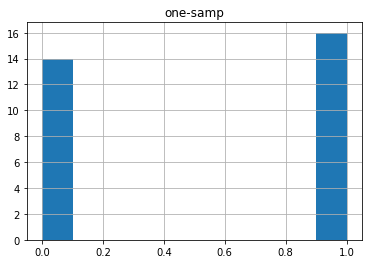

In [7]:
# Plot histogram to look at distribution of a single coin flip
# Binomial distribution - not normal distribution
df.hist()

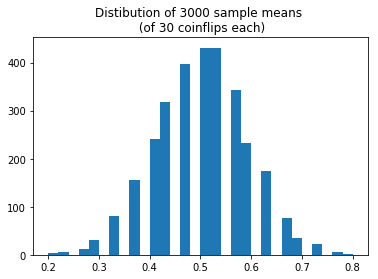

In [8]:
# Plot histogram to look at distribution of all coin flips - the histogram of the means creates a normal distibution
ax = plt.hist(sample_means, bins=30)
plt.title(f'Distibution of {N} sample means \n (of 30 coinflips each)');

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

## Standard Error of the Mean

What does it mean to "estimate"? the Population mean?

In [9]:
import numpy as np
import pandas as pd

# Average Height
mu = 70
sigma = 3

lambda_heights = np.random.normal(mu, sigma, 2000)
print(len(lambda_heights))
lambda_heights

2000


array([74.59953591, 72.84065102, 67.61677689, ..., 74.89395874,
       70.97390281, 70.29305604])

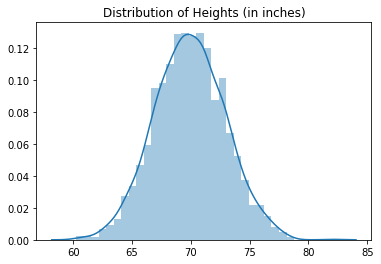

In [10]:
import seaborn as sns

sns.distplot(lambda_heights)
plt.title('Distribution of Heights (in inches)');

In [11]:
print("Population Mean:", lambda_heights.mean())
print("Population Standard Deviation:", lambda_heights.std())

Population Mean: 69.91734410462203
Population Standard Deviation: 2.9874993904231233


In [12]:
population = pd.DataFrame({'heights': lambda_heights})
print(population.shape)
population.head()

(2000, 1)


,heights
0,74.599536
1,72.840651
2,67.616777
3,74.815983
4,67.466771


In [13]:
# Take a random sample and print sample mean
sample1 = population.sample(100)
print(sample1.shape)
sample1.head()

(100, 1)


,heights
612,68.141476
386,71.549586
260,69.033835
1014,72.319649
1959,70.633612


In [14]:
print('Sample Mean #1:', sample1['heights'].mean())

Sample Mean #1: 70.01201408509293


In [15]:
# Take a different random sample and print sample mean
sample2 = population.sample(100)
print(sample2.shape)
sample2.head()

(100, 1)


,heights
1128,64.728409
1,72.840651
1463,70.994198
204,71.099117
568,75.653545


In [16]:
print('Sample Mean #2:', sample2['heights'].mean())

Sample Mean #2: 70.35654702370185


## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [17]:
import numpy as np
coinflips_100 = np.random.binomial(n=1, p=0.5, size=100)

sample_std = np.std(coinflips_100)
print('Sample St Dev:', sample_std)
sample_size = len(coinflips_100)
print('Sample Size:', sample_size)

Sample St Dev: 0.4950757517794625
Sample Size: 100


In [18]:
standard_error = sample_std/np.sqrt(sample_size)
print(standard_error)

0.04950757517794625


### What confidence level do we want our confidence interval to represent?
95% confidence Interval? 99% confidence interval?

In [19]:
import scipy.stats as stats

t = stats.t.ppf(0.975, sample_size-1)
t

1.9842169515086827

In [20]:
sample_mean = coinflips_100.mean()
confidence_interval = (sample_mean - t*standard_error, sample_mean + t*standard_error)
margin_of_error = t*standard_error

print('Sample Mean:', sample_mean)
print('Margin of Error:', margin_of_error)
print('Confidence Interval:', confidence_interval)

Sample Mean: 0.43
Margin of Error: 0.09823376989617144
Confidence Interval: (0.33176623010382855, 0.5282337698961714)


## Graphically Represent a Confidence Interval

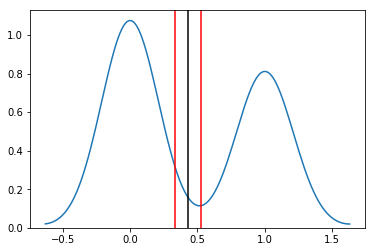

In [21]:
import seaborn as sns

sns.kdeplot(coinflips_100)
plt.axvline(x=sample_mean, color='k')
plt.axvline(x=confidence_interval[0], color='r')
plt.axvline(x=confidence_interval[1], color='r')

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [23]:
import numpy as np

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.5, 0.5, 0.5333333333333333, 0.6333333333333333, 0.5, 0.4666666666666667, 0.7, 0.6333333333333333, 0.6, 0.5, 0.5, 0.43333333333333335, 0.36666666666666664, 0.5666666666666667, 0.5, 0.5, 0.3333333333333333, 0.4666666666666667, 0.5333333333333333, 0.6, 0.5333333333333333, 0.5, 0.6333333333333333, 0.6333333333333333, 0.5666666666666667, 0.5666666666666667, 0.4, 0.6, 0.5333333333333333, 0.5, 0.5333333333333333, 0.5666666666666667, 0.5666666666666667, 0.6333333333333333, 0.43333333333333335, 0.5, 0.43333333333333335, 0.36666666666666664, 0.4666666666666667, 0.5, 0.5333333333333333, 0.5333333333333333, 0.7, 0.5666666666666667, 0.5, 0.36666666666666664, 0.6, 0.4, 0.6, 0.5333333333333333, 0.5, 0.6333333333333333, 0.5333333333333333, 0.6666666666666666, 0.4, 0.3, 0.43333333333333335, 0.4, 0.4, 0.5, 0.5666666666666667, 0.5333333333333333, 0.5, 0.4, 0.5333333333333333, 0.36666666666666664, 0.4666666666666667, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.3333333333333333, 0.4666

In [24]:
np.mean(coinflip_means)

0.5056666666666667

In [25]:
# 95% confidence interval
t_stat = stats.t.ppf(0.975, 99)
print('T Stat:', t_stat)

std_sample = np.std(coinflip_means)
std_err = std_sample/np.sqrt(len(coinflip_means))

CI = stats.t.interval(0.95, 99, loc=np.mean(coinflip_means), scale=std_err)
print('95% confidence interval:', CI)

T Stat: 1.9842169515086827
95% confidence interval: (0.4877462348288624, 0.523587098504471)


A null hypothesis that's just inside of our confidence interval == fail to reject

A null hypothesis that's just outside of our confidence interval == reject



In [26]:
ttest_1samp(coinflip_means, 0.47805)

Ttest_1sampResult(statistic=3.04249266604171, pvalue=0.0030041189040911514)

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


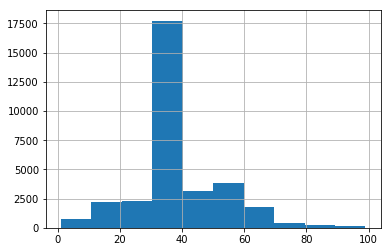

In [30]:
df['hours-per-week'].hist();

In [31]:
# Include only categorical data
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [32]:
cut_points = [0, 9, 19, 29, 39, 49, 500]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)
df.hours_per_week_categories.value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [33]:
df.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [34]:
# Observed values
df.sort_values(by='hours_per_week_categories', ascending=True)
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_categories'], margins=True)
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,6462,1246,18336,3667,458,2392,32561


## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [35]:
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values
print(row_sums)
print(col_sums)

total = contingency_table.loc['All', 'All']
total

[10771 21790]
[ 6462  1246 18336  3667   458  2392]


32561

In [36]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column * row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 6)
[[ 2137.59411566   412.16995793  6065.44811277  1213.02346365
    151.50388502   791.26046497]
 [ 4324.40588434   833.83004207 12270.55188723  2453.97653635
    306.49611498  1600.73953503]]


## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [37]:
observed = pd.crosstab(df['sex'], df['hours_per_week_categories']).values
print(observed.shape)
observed

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

In [38]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

729291.9658823247

## Run a $\chi^{2}$ Test using Scipy

In [39]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

2287.190943926107 0.0 5 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


## Code Challenge

In [40]:
def array_sum(input_array, sum_num):
  
  # initialize size, an empty set, an empty array
  array_size = len(input_array)
  s = set()
  v = []
  
  # iterate through the input array
  for i in range(0, array_size):
    # check the difference
    temp = sum_num - input_array[i] 
    # if difference is already stored then match exists
    if (temp in s):
        v.append(input_array[i])
        v.append(temp)
    # add the value to the stored values
    s.add(input_array[i])
  
  return(v)

A = [3,5,-4,8,11,1,-1,6]
n = 10
output_array = array_sum(A, n)
output_array.sort()
print(output_array)

[-1, 11]


## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [67]:
# Load data
voting_data = pd.read_csv('https://raw.githubusercontent.com/JimKing100/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/master/house-votes-84.data',
                          header=None)

voting_data = voting_data.rename(columns={0: 'party'})
voting_data[voting_data=='?'] = 'n'
voting_data[voting_data=='n'] = 0
voting_data[voting_data=='y'] = 1
print(voting_data.shape)
voting_data.head()


(435, 17)


,party,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

for i in range(1, 17):
  
  rep_data = voting_data[voting_data['party'] == 'republican'][i]
  dem_data = voting_data[voting_data['party'] == 'democrat'][i]
  rep_mean = voting_data[voting_data['party'] == 'republican'][i].mean()
  dem_mean = voting_data[voting_data['party'] == 'democrat'][i].mean()

  vr_mean, vr_low, vr_high = confidence_interval(rep_data)
  vd_mean, vd_low, vd_high = confidence_interval(dem_data)
  
  #print('rep mean = ', vr_mean)
  #print('dem mean = ', vd_mean)
  #print('rep low interval issue %d - ' %i, vr_low)
  #print('rep high interval issue %d - ' %i, vr_high)
  #print('dem low interval issue %d - ' %i, vd_low)
  #print('dem high interval issue %d - ' %i, vd_high)
  #print('\n')
  
  #sns.kdeplot(rep_data)
  #plt.axvline(x=vr_mean, color='k')
  #plt.axvline(x=vr_low, color='r')
  #plt.axvline(x=vr_high, color='r')
  
  #sns.kdeplot(dem_data)
  #plt.axvline(x=vd_mean, color='k')
  #plt.axvline(x=vd_low, color='r')
  #plt.axvline(x=vd_high, color='r')
  #plt.show()

## Chi-Squared Numpy

In [83]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [88]:
# Observed values
df.sort_values(by='education', ascending=True)
contingency_table = pd.crosstab(df['sex'], df['education'], margins=True)
contingency_table

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
sex,,,,,,,,,,,,,,,,,
Female,295,432,144,46,84,160,144,421,500,1619,86,3390,536,16,92,2806,10771
Male,638,743,289,122,249,486,370,646,882,3736,327,7111,1187,35,484,4485,21790
All,933,1175,433,168,333,646,514,1067,1382,5355,413,10501,1723,51,576,7291,32561


In [90]:
row_sums = contingency_table.iloc[0:2, 16].values
col_sums = contingency_table.iloc[2, 0:16].values
print(row_sums)
print(col_sums)

total = contingency_table.loc['All', 'All']
total

[10771 21790]
[  933  1175   433   168   333   646   514  1067  1382  5355   413 10501
  1723    51   576  7291]


32561

In [91]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column * row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 16)
[[ 308.63127668  388.6835478   143.2340223    55.57347747  110.15457142
   213.69325266  170.02837751  352.95774086  457.15801112 1771.40459445
   136.61813212 3473.67313657  569.95893861   16.87051995  190.53763705
  2411.82276343]
 [ 624.36872332  786.3164522   289.7659777   112.42652253  222.84542858
   432.30674734  343.97162249  714.04225914  924.84198888 3583.59540555
   276.38186788 7027.32686343 1153.04106139   34.12948005  385.46236295
  4879.17723657]]


In [92]:
observed = pd.crosstab(df['sex'], df['education']).values
print(observed.shape)
observed

(2, 16)


array([[ 295,  432,  144,   46,   84,  160,  144,  421,  500, 1619,   86,
        3390,  536,   16,   92, 2806],
       [ 638,  743,  289,  122,  249,  486,  370,  646,  882, 3736,  327,
        7111, 1187,   35,  484, 4485]])

In [95]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

297.71500372503687

## Chi-Squared SciPy

In [94]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

297.71500372503687 1.667778440920507e-54 15 [[ 308.63127668  388.6835478   143.2340223    55.57347747  110.15457142
   213.69325266  170.02837751  352.95774086  457.15801112 1771.40459445
   136.61813212 3473.67313657  569.95893861   16.87051995  190.53763705
  2411.82276343]
 [ 624.36872332  786.3164522   289.7659777   112.42652253  222.84542858
   432.30674734  343.97162249  714.04225914  924.84198888 3583.59540555
   276.38186788 7027.32686343 1153.04106139   34.12948005  385.46236295
  4879.17723657]]


## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)